In [1]:
#선형회귀
#릿지, 라쏘 회귀
#다항회귀
#경사하강법
#로지스틱회귀

In [2]:
#MSE (Mean Square Error): 평범 그 자체인듯, 모든 샘플에 대해 수행.
#argmin_theta[ sum((theta*Xi-yi)^2) ]

![n1](image/img1.png)

In [3]:
import numpy as np
import pandas as pd

In [4]:
X = 2*np.random.rand(100,1)
#rand함수는 0과 1사이에서 균등하게 난수를 발생시킨다.
y = 4 + 3*X+np.random.randn(100,1)
#randn은 표준 분포에 대한 난수를 만들기 때문에, 정규분포이다. 평균이 0이고 표준편차가 1이다.

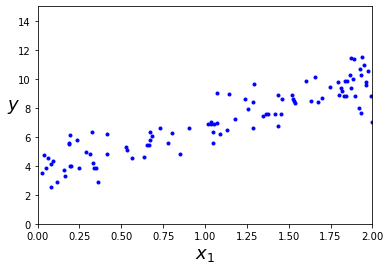

In [5]:
import matplotlib.pyplot as plt
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [6]:
X_b = np.c_[np.ones((100,1)),X] #모든 샘플에 x0=1을 추가한다. 절편이 붙는다..

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
#np.linalg.inv -> 역행렬구하기 함수.
theta_best
# 0:절편
# 1: 기울기.

array([[3.66193483],
       [3.1479419 ]])

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[3.66193483],
       [9.95781863]])

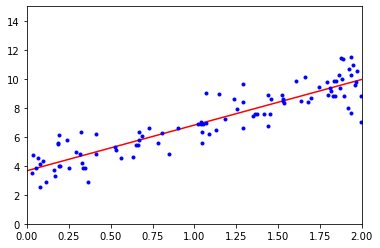

In [8]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.66193483]), array([[3.1479419]]))

In [10]:
lin_reg.predict(X_new)

array([[3.66193483],
       [9.95781863]])

In [11]:
theta_best_svd, residuals, rank, s= np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd
#lstsq : least squares

array([[3.66193483],
       [3.1479419 ]])

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[3.66193483],
       [3.1479419 ]])

# 배치 경사하강법
- 비용 함수를 최소화하기 위해 반복적으로 모델 파라미터를 조정
- 경사 하강법의 문제 : local, global 해가 다를 수 있기때문
- 데이터의(theta1, theta2) Scale을 맞춰줘야하는 이유가 된다.

In [13]:
eta = 0.1 #학습률
n_iteration = 1000
m =100

theta = np.random.randn(2,1) # 랜덤초기화

for iteration in range(n_iteration):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    #MSE 미분값으로 gradient 계산
    theta = theta - eta * gradients
    #에타를 통해 너무 급하지 않게

In [14]:
theta

array([[3.66193483],
       [3.1479419 ]])

In [15]:
X_new_b.dot(theta)

array([[3.66193483],
       [9.95781863]])

In [16]:
theta_path_bgd=[]

def plot_gradient_descent(theta,eta,theta_path=None):
    m=len(X_b)
    plt.plot(X,y,"b.")
    n_iterations=1000
    for iteration in range(n_iterations):
        if iteration <10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration>0 else "r--"
            plt.plot(X_new, y_predict,style)
            
        gradients=2/m* X_b.T.dot(X_b.dot(theta)-y)
        theta=theta-eta*gradients
        
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$",fontsize=18)
    plt.axis([0,2,0,15])
    plt.title(r"$\eta={}$".format(eta),fontsize=16)
    

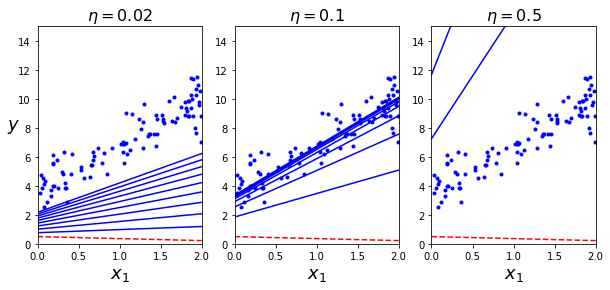

In [17]:
np.random.seed(42)
theta=np.random.randn(2,1) #random initialize

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta,eta=0.02)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.subplot(132); plot_gradient_descent(theta,eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta,eta=0.5)

# 확률적 경사 하강법

- 에포크 시작 -> 훈련세트 섞기 -> 훈련세트에서 샘플 하나 꺼내기, 경사 하강법 수행, 모델 파라미터 수정, 반복-> 훈련세트 섞기 -> ?

In [18]:
theta_path_sgd=[]
m=len(X_b)
np.random.seed(42)

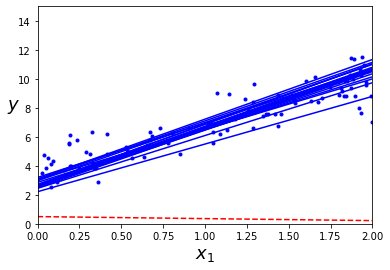

In [19]:
n_epochs=50
t0, t1 = 5,50 #학습 스케줄 하이퍼파라미터

#에타값을 점점 줄인다..?.
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch ==0 and i<20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i>0 else "r--"
            plt.plot(X_new,y_predict,style)
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1] #중복을 허용한다라..
        yi=y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta=theta-eta*gradients
        theta_path_sgd.append(theta)
        
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [20]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3,penalty=None,eta0=0.1,random_state=42)
#여기서 eta0는 위에서의 eta와는 조금 다르다..
#learning_rate -> invscaling과 관련,,
sgd_reg.fit(X,y.ravel())
#ravel 함수로 편다음에 전달..

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [22]:
sgd_reg.coef_, sgd_reg.intercept_

(array([3.09517814]), array([3.64508624]))

# 미니배치 경사 하강법

In [24]:
theta_path_mgd=[]

n_iterations=50
minibatch_size=20

np.random.seed(42)
theta = np.random.randn(2,1)

t0,t1=200,1000
def learning_schedule(t):
    return t0/(t+t1)

t=0

for epoch in range(n_iterations):
    shuffled_indices=np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,m,minibatch_size):
        t+=1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(t)
        theta=theta -eta*gradients
        theta_path_mgd.append(theta)

In [25]:
theta

array([[3.64512634],
       [3.10634188]])

In [26]:
theta_path_bgd=np.array(theta_path_bgd)#배치경사하강법
theta_path_sgd=np.array(theta_path_sgd)#확률적경사배치
theta_path_mgd=np.array(theta_path_mgd)#미니배치

Text(0, 0.5, '$\\theta_1$')

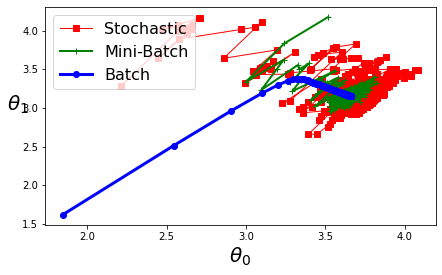

In [29]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1],"r-s",linewidth=1,label="Stochastic")
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1],"g-+",linewidth=2,label="Mini-Batch")
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1],"b-o",linewidth=3,label="Batch")

plt.legend(loc="upper left",fontsize=16)
plt.xlabel(r"$\theta_0$",fontsize=20)
plt.ylabel(r"$\theta_1$",fontsize=20,rotation=0)